In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Read in dataframes
df = pd.read_csv('./data/ratings-per-ep.csv')
df2 = pd.read_csv('./data/lines_per_episode.csv')
df3 = pd.read_csv('./data/marcin-office-data.csv')

In [36]:
# Remove any unneeded columns
df = df[['season', 'episode', 'rating']]
df

,season,episode,rating
0,1,1,7.5
1,1,2,8.3
2,1,3,7.8
3,1,4,8.1
4,1,5,8.4
...,...,...,...
183,9,19,8.0
184,9,20,8.0
185,9,21,9.0
186,9,22,9.5


In [37]:
# Remove any unneeded columns
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2

,season,episode,total_lines,andy,angela,charles,clark,creed,darryl,david wallace,...,oscar,other,pam,pete,phyllis,robert california,roy,ryan,stanley,toby
0,1,1,228,0,1,0,0,0,0,0,...,3,4,40,0,2,0,5,8,5,0
1,1,2,203,0,4,0,0,0,0,0,...,13,36,12,0,0,0,0,4,5,2
2,1,3,243,0,5,0,0,0,0,0,...,9,4,32,0,0,0,0,1,6,0
3,1,4,243,0,7,0,0,0,0,0,...,14,5,22,0,5,0,3,4,2,4
4,1,5,230,0,3,0,0,0,15,0,...,2,18,14,0,4,0,12,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,260,31,2,0,36,2,0,0,...,7,24,9,2,5,7,0,0,18,14
182,9,20,233,39,16,0,6,1,10,0,...,2,38,22,4,0,2,0,0,2,7
183,9,21,382,68,30,0,8,2,11,37,...,19,12,30,5,4,0,0,0,4,7
184,9,22,501,44,39,0,5,4,30,0,...,28,65,34,4,7,0,0,0,4,0


In [38]:
# Remove any unneeded columns
df3.drop(['Unnamed: 0', 'name'], axis=1, inplace=True)
df3

,laughs,importance_to_office_universe,memorability_quotability,emotional_weight,season,episode
0,5.99,6.01,5.88,5.67,8,8
1,6.03,6.01,5.84,5.88,9,19
2,6.07,5.99,6.03,6.05,8,10
3,5.98,5.55,5.33,7.33,7,3
4,6.31,6.01,6.21,5.67,6,6
...,...,...,...,...,...,...
181,8.78,9.03,9.22,9.65,7,22
182,9.45,9.01,9.12,9.13,4,1
183,9.23,9.40,9.11,9.41,2,1
184,9.25,9.10,9.30,9.60,2,22


In [39]:
# Normalize data by dividing each speaker's lines by the total lines in each episode (yields their percent of total lines in each episode)
df2.iloc[:, 3:35] = df2.iloc[:, 3:35].div(df2['total_lines'], axis=0)
df2

,season,episode,total_lines,andy,angela,charles,clark,creed,darryl,david wallace,...,oscar,other,pam,pete,phyllis,robert california,roy,ryan,stanley,toby
0,1,1,228,0.000000,0.004386,0.0,0.000000,0.000000,0.000000,0.000000,...,0.013158,0.017544,0.175439,0.000000,0.008772,0.000000,0.021930,0.035088,0.021930,0.000000
1,1,2,203,0.000000,0.019704,0.0,0.000000,0.000000,0.000000,0.000000,...,0.064039,0.177340,0.059113,0.000000,0.000000,0.000000,0.000000,0.019704,0.024631,0.009852
2,1,3,243,0.000000,0.020576,0.0,0.000000,0.000000,0.000000,0.000000,...,0.037037,0.016461,0.131687,0.000000,0.000000,0.000000,0.000000,0.004115,0.024691,0.000000
3,1,4,243,0.000000,0.028807,0.0,0.000000,0.000000,0.000000,0.000000,...,0.057613,0.020576,0.090535,0.000000,0.020576,0.000000,0.012346,0.016461,0.008230,0.016461
4,1,5,230,0.000000,0.013043,0.0,0.000000,0.000000,0.065217,0.000000,...,0.008696,0.078261,0.060870,0.000000,0.017391,0.000000,0.052174,0.034783,0.013043,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,260,0.119231,0.007692,0.0,0.138462,0.007692,0.000000,0.000000,...,0.026923,0.092308,0.034615,0.007692,0.019231,0.026923,0.000000,0.000000,0.069231,0.053846
182,9,20,233,0.167382,0.068670,0.0,0.025751,0.004292,0.042918,0.000000,...,0.008584,0.163090,0.094421,0.017167,0.000000,0.008584,0.000000,0.000000,0.008584,0.030043
183,9,21,382,0.178010,0.078534,0.0,0.020942,0.005236,0.028796,0.096859,...,0.049738,0.031414,0.078534,0.013089,0.010471,0.000000,0.000000,0.000000,0.010471,0.018325
184,9,22,501,0.087824,0.077844,0.0,0.009980,0.007984,0.059880,0.000000,...,0.055888,0.129741,0.067864,0.007984,0.013972,0.000000,0.000000,0.000000,0.007984,0.000000


In [40]:
# Merge IMDB ratings dataframe with line/speaker percents dataframe
initial_merged_df = pd.merge(df, df2, how='left', on=['season', 'episode'])

# Merge new dataframe with Marcin ratings dataframe
merged_df = pd.merge(initial_merged_df, df3, how='left', on=['season', 'episode'])
merged_df

,season,episode,rating,total_lines,andy,angela,charles,clark,creed,darryl,...,phyllis,robert california,roy,ryan,stanley,toby,laughs,importance_to_office_universe,memorability_quotability,emotional_weight
0,1,1,7.5,228.0,0.000000,0.004386,0.0,0.000000,0.000000,0.000000,...,0.008772,0.000000,0.021930,0.035088,0.021930,0.000000,8.19,8.65,7.02,6.12
1,1,2,8.3,203.0,0.000000,0.019704,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.019704,0.024631,0.009852,8.53,6.95,7.01,6.17
2,1,3,7.8,243.0,0.000000,0.020576,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.004115,0.024691,0.000000,8.88,6.99,8.53,5.30
3,1,4,8.1,243.0,0.000000,0.028807,0.0,0.000000,0.000000,0.000000,...,0.020576,0.000000,0.012346,0.016461,0.008230,0.016461,7.95,7.01,6.97,5.40
4,1,5,8.4,230.0,0.000000,0.013043,0.0,0.000000,0.000000,0.065217,...,0.017391,0.000000,0.052174,0.034783,0.013043,0.000000,7.95,8.55,6.83,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,9,19,8.0,260.0,0.119231,0.007692,0.0,0.138462,0.007692,0.000000,...,0.019231,0.026923,0.000000,0.000000,0.069231,0.053846,6.03,6.01,5.84,5.88
184,9,20,8.0,233.0,0.167382,0.068670,0.0,0.025751,0.004292,0.042918,...,0.000000,0.008584,0.000000,0.000000,0.008584,0.030043,6.04,7.88,6.22,8.12
185,9,21,9.0,382.0,0.178010,0.078534,0.0,0.020942,0.005236,0.028796,...,0.010471,0.000000,0.000000,0.000000,0.010471,0.018325,8.26,9.09,9.01,8.71
186,9,22,9.5,501.0,0.087824,0.077844,0.0,0.009980,0.007984,0.059880,...,0.013972,0.000000,0.000000,0.000000,0.007984,0.000000,8.11,8.96,9.47,9.09


In [41]:
# corrmatrix['rating'].nlargest(10)
# corrmatrix['rating'].nsmallest(10)

In [42]:
def get_all_corrs_per_szn():
    df_list= []
    for i in range(1,10):
        corr_matr = merged_df[merged_df['season'] == i].corr()
        df_list.append(corr_matr)      
    return df_list

def get_corr_by_szn(i):
    corr_matr = merged_df[merged_df['season'] == i].corr()
    return corr_matr

In [43]:
# https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

# Get Pearson correlation coefficient matrix to see which columns (if any) are correlated with one another
# Are any of Marcin's ratings correlated with a particular character (or characters)?
rho = merged_df.corr()

# Calculate p-values for each (pearsonr(x,y)[1] returns p-value) and subtract identity matrix
pval = merged_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

# Use asterisks to indicate statistical significance (with p-values)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))

# print p-value indicators w/ correlation matrix
rho.round(2).astype(str) + p

,season,episode,rating,total_lines,andy,angela,charles,clark,creed,darryl,...,phyllis,robert california,roy,ryan,stanley,toby,laughs,importance_to_office_universe,memorability_quotability,emotional_weight
season,1.0***,0.1,-0.39***,0.12,0.56***,0.15*,-0.03,0.35***,-0.07,0.39***,...,0.06,0.34***,-0.41***,-0.16*,-0.04,-0.0,-0.45***,-0.14,-0.17*,0.12
episode,0.1,1.0***,0.17*,0.03,-0.05,-0.04,0.24***,-0.02,0.04,-0.04,...,0.04,-0.03,-0.13,0.02,-0.06,-0.04,-0.02,0.06,0.11,0.09
rating,-0.39***,0.17*,1.0***,0.33***,-0.32***,0.07,0.11,-0.19**,0.09,-0.22**,...,0.07,-0.33***,0.08,0.02,0.11,0.0,0.48***,0.49***,0.51***,0.41***
total_lines,0.12,0.03,0.33***,1.0***,0.02,0.23**,-0.02,-0.02,0.04,0.03,...,0.03,-0.08,-0.15*,0.06,-0.03,-0.04,0.09,0.25***,0.22**,0.3***
andy,0.56***,-0.05,-0.32***,0.02,1.0***,0.07,-0.08,0.06,-0.08,0.25***,...,-0.03,0.49***,-0.31***,-0.11,-0.02,-0.14,-0.33***,-0.23**,-0.18*,-0.08
angela,0.15*,-0.04,0.07,0.23**,0.07,1.0***,-0.09,0.12,0.12,-0.02,...,0.2**,-0.11,-0.13,-0.13,0.04,0.02,0.04,0.21**,0.16*,0.19**
charles,-0.03,0.24***,0.11,-0.02,-0.08,-0.09,1.0***,-0.04,-0.1,-0.13,...,-0.09,-0.06,-0.06,0.07,-0.03,-0.1,-0.03,0.17*,0.02,-0.03
clark,0.35***,-0.02,-0.19**,-0.02,0.06,0.12,-0.04,1.0***,-0.03,0.06,...,-0.06,-0.04,-0.03,-0.17*,0.14,0.04,-0.27***,-0.04,-0.13,0.0
creed,-0.07,0.04,0.09,0.04,-0.08,0.12,-0.1,-0.03,1.0***,-0.02,...,0.09,-0.1,-0.03,0.01,0.02,0.09,0.01,-0.07,0.07,0.0
darryl,0.39***,-0.04,-0.22**,0.03,0.25***,-0.02,-0.13,0.06,-0.02,1.0***,...,0.0,0.18*,0.02,-0.1,-0.07,-0.01,-0.26***,-0.13,-0.14*,-0.0


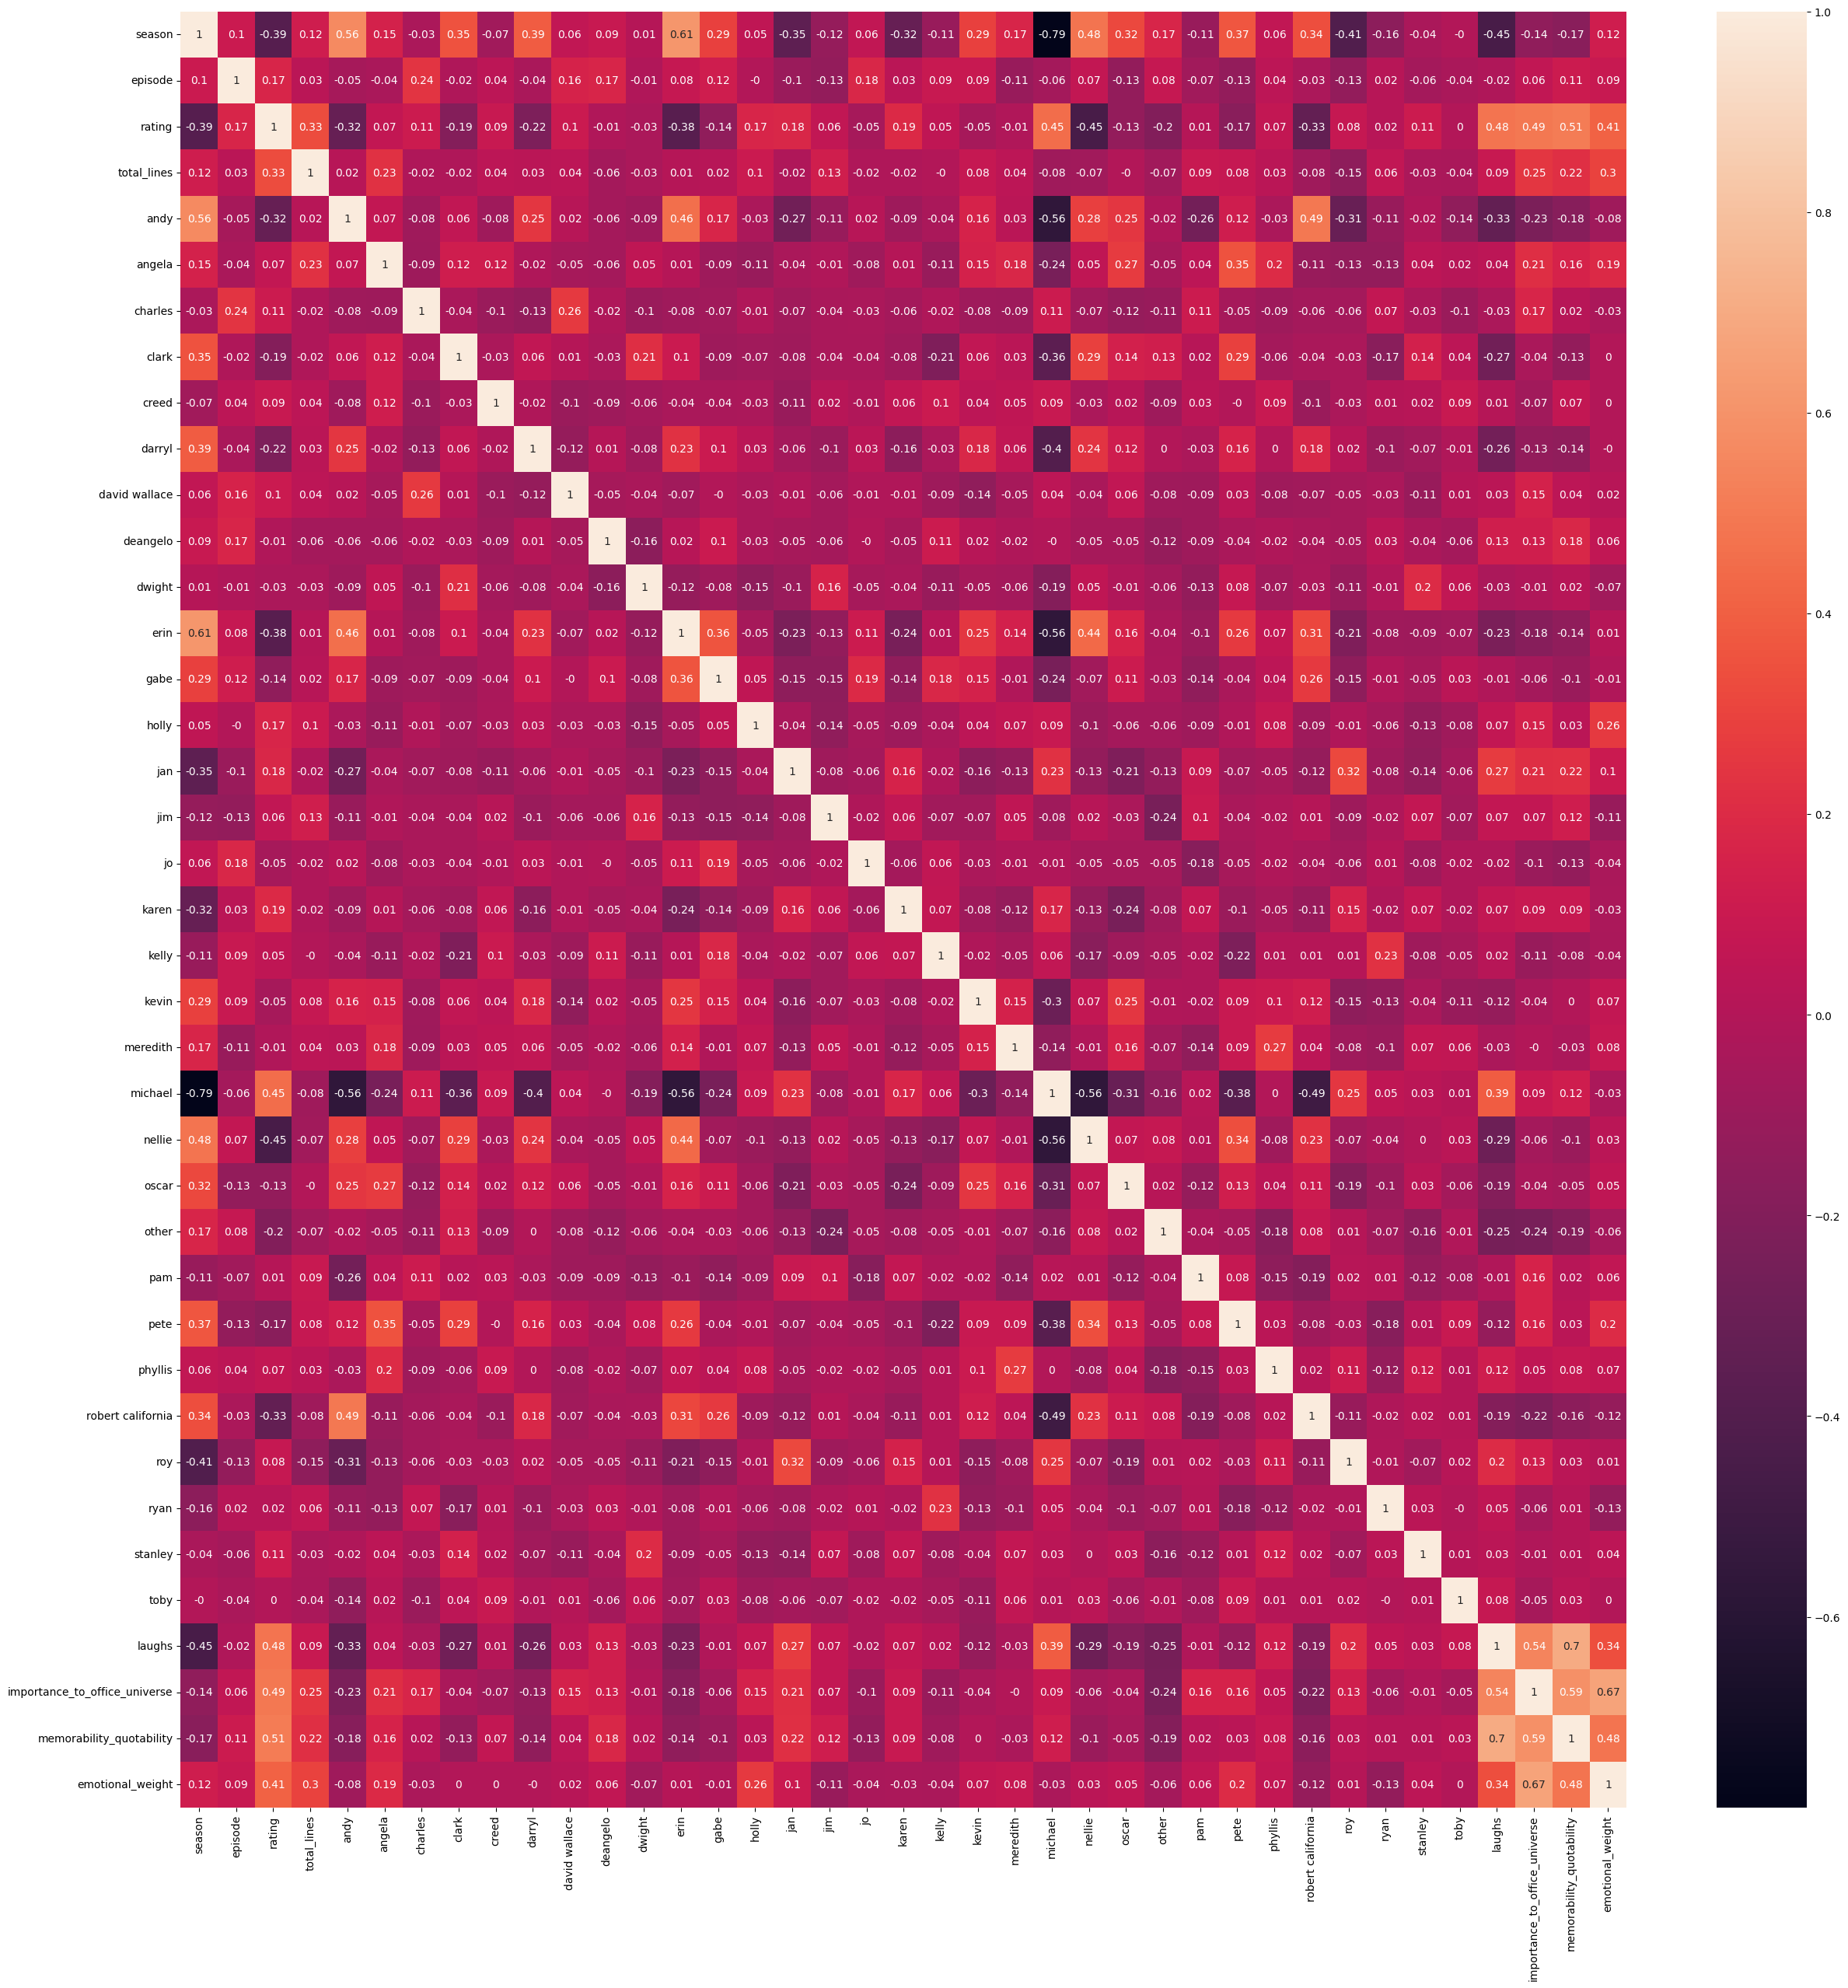

In [58]:
sns.heatmap(rho.round(2), annot = True)

plt.rcParams['figure.figsize'] = (30, 20)

plt.show()

<AxesSubplot:xlabel='michael', ylabel='laughs'>

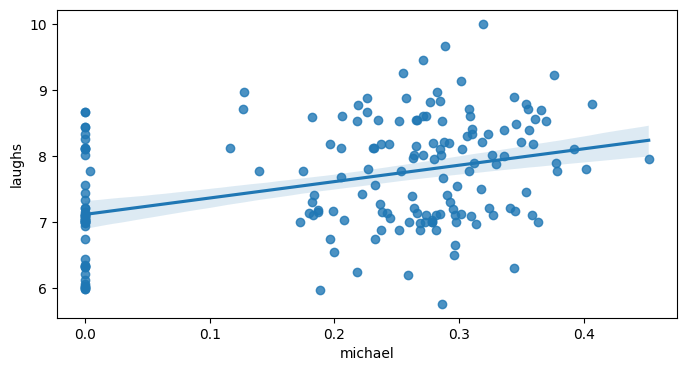

In [60]:
plt.rcParams['figure.figsize'] = (8, 4)

sns.regplot(x='michael', y='laughs', data=merged_df)

<AxesSubplot:xlabel='season', ylabel='memorability_quotability'>

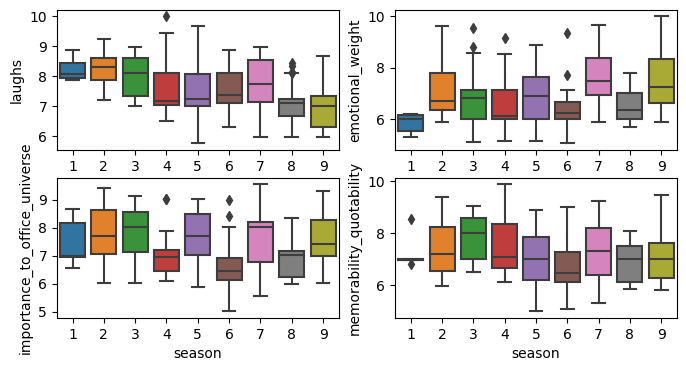

In [85]:
fig, axes = plt.subplots(2,2)

sns.boxplot(x="season", y="laughs", data=merged_df, ax=axes[0,0])

sns.boxplot(x="season", y="emotional_weight", data=merged_df, ax=axes[0,1])

sns.boxplot(x="season", y="importance_to_office_universe", data=merged_df, ax=axes[1,0])

sns.boxplot(x="season", y="memorability_quotability", data=merged_df, ax=axes[1,1])

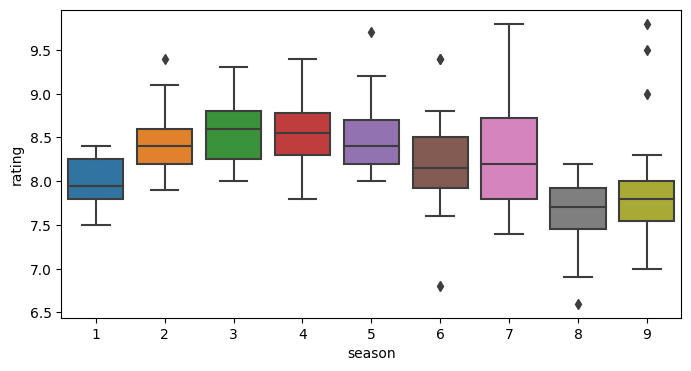

In [87]:
sns.boxplot(x="season", y="rating", data=merged_df)
plt.show()